<a href="https://colab.research.google.com/github/Abogundipe/Housing-Project-/blob/main/Abidemi_Ogundipe_Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project**

We would be working with the "apartments.csv" dataset, which includes detailed listings of apartments. Each listing features the rental price, square footage, geographic coordinates, and the number of bedrooms and bathrooms, among other attributes. The task involves three main objectives:

**Data Cleaning:** Begin by sanitizing the dataset. Ensure all numerical fields contain only valid numbers and remove any non-conforming entries or anomalies.

**Data Analysis:** Next, apply various data analysis techniques to extract insights from the data, with a focus on understanding the factors that influence rental prices.

**Data Visualization:** Create charts and graphs that display the relationships you've identified in the data.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
import requests
import plotly.express as px

# Part 1 - Data Cleaning

Load the Dataset: Import the dataset into a pandas dataframe.
Clean `'price'`, `'square_feet'`, `'bathrooms'`, `'bedrooms'`,`'latitude'`, `'longitude'` by only keeping numeric values and dropping and missing or non-numeric values.
Clean the `'state'` column by dropping anything that is not two upper case letters.
Reset the index.
Your dataframe at the end should have 98769 entries.

In [ ]:
# Part 1 - Code:

# Load the dataset
file_path = 'Data/apartments.csv'
apartments_df = pd.read_csv(file_path)

# Cleaning the dataset

# Dropping non-numeric values and missing values for specified columns
numeric_columns = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
apartments_df[numeric_columns] = apartments_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
apartments_df = apartments_df.dropna(subset=numeric_columns)

# Cleaning the 'state' column: keeping entries with exactly two uppercase letters
apartments_df = apartments_df[apartments_df['state'].str.match(r'^[A-Z]{2}$') == True]

# Resetting the index
apartments_df.reset_index(drop=True, inplace=True)

# Verifying the number of rows
number_of_rows = len(apartments_df)
print(f"The cleaned dataframe has {number_of_rows} rows.")


/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (6,11,15,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
The cleaned dataframe has 98769 rows.


# Part 2 - Multivariate Clustering of Apartment Listings

## Starter Task

1. **Implement KMeans clustering** on the dataset using only the longitude and latitude features. Configure the algorithm to create 51 clusters with the random state set to 12345.

2. **Visualize the clustering result** using a matplotlib chart. Employ a continuous color scale to represent the 51 clusters.


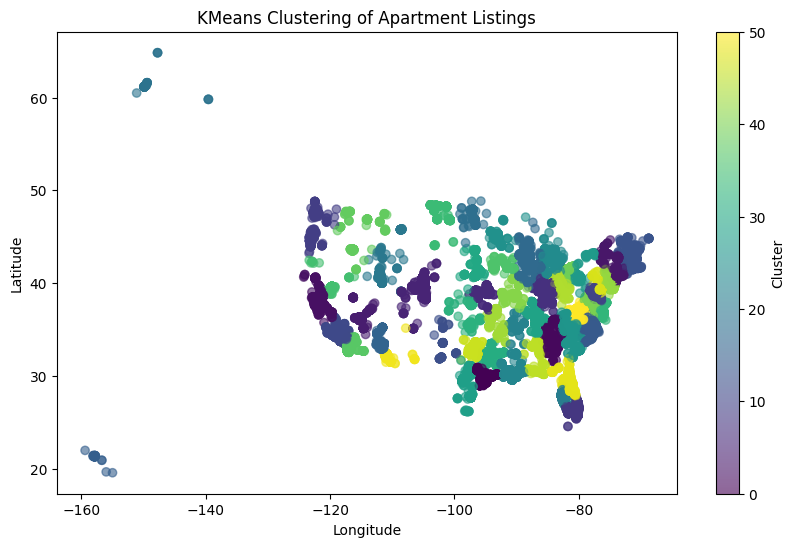

In [ ]:
# Part 2 - Starter Task Code:

# Implementing KMeans clustering using longitude and latitude
kmeans = KMeans(n_clusters=51, random_state=12345)
apartments_df['cluster'] = kmeans.fit_predict(apartments_df[['longitude', 'latitude']])

# Visualizing the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(apartments_df['longitude'], apartments_df['latitude'], c=apartments_df['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering of Apartment Listings')
plt.show()


## Enhanced Task

1. **Augment your analysis** by incorporating additional variables of your choice, such as `'price'`, `'bedrooms'`, `'square_feet'`, `'amenities'`, or others into the clustering algorithm. You may adjust the number of clusters as needed while maintaining the random state at 12345.

2. **Generate a chart to display the clustering outcome**, plotting `'longitude'` and `'latitude'` coordinates. Use matplotlib with a continuous color scale for the clusters.

## Enhanced Task Explanation

**Detail the rationale** behind your choice of variables for the enhanced clustering model. Explain why you selected these specific features and how they contribute to the insights derived from the data.

I included 'price', 'bedrooms', and 'square feet' alongside geographic coordinates for a more nuanced multidimensional analysis.

*Geographic coordinates* are essential for spatial analysis in real estate, indicating location-based preferences and values.

*Price* is a pivotal factor in real estate, influencing and reflecting apartment desirability and value. The inclusion of price helps to understand how rental costs vary across locations and apartment features.

*Bedrooms* indicate an apartment's capacity and size, affecting tenant demographics and preferences.

The *square footage* directly relates to an apartment's size and luxury level, impacting its appeal and value.

By integrating these variables, the model offers comprehensive insights into market patterns, correlating location with price, size, and capacity.

# Part 3 - Regressions

## Starter Task

You will be developing a linear regression model to predict apartment rental prices. Follow these steps to complete the task:

1. **Data Preparation:**
    - Extract features `['bathrooms', 'bedrooms', 'square_feet']` and the target variable `'price'` from the `df` DataFrame.
    - Split the data into training and testing sets using `train_test_split`. Allocate 90% for training and 10% for testing, ensuring reproducibility by setting `random_state=12345`.

2. **Baseline Prediction:**
    - Calculate the mean price from the training set and use this as a constant prediction for all entries in the test set.
    - Compute the Root Mean Squared Error (RMSE) for this baseline prediction against the actual prices in the test set.

3. **Linear Regression Model:**
    - Initialize a `LinearRegression` model.
    - Perform 10-fold cross-validation using `cross_val_score` with RMSE as the scoring metric.
    - Calculate the average RMSE from the cross-validation scores.

4. **Model Training and Evaluation:**
    - Train the linear regression model on the full training set.
    - Predict apartment prices on the test set and calculate the RMSE of these predictions.

5. **Output:**
    - Print the average RMSE from cross-validation: `print(f"Average RMSE from cross-validation: {average_rmse}")`
    - Print the RMSE for the test set predictions: `print(f"RMSE on test set: {rmse_test}")`
    - Print the baseline RMSE for comparison: `print(f"Baseline RMSE using average price: {average_price_rmse_test}")`

In [ ]:
# Part 3 - Starter Task Code:

# Data Preparation
features = ['bathrooms', 'bedrooms', 'square_feet']
target = 'price'
X = apartments_df[features]
y = apartments_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)

# Baseline Prediction
mean_price_train = y_train.mean()
baseline_predictions = np.full(shape=y_test.shape, fill_value=mean_price_train)
average_price_rmse_test = np.sqrt(mean_squared_error(y_test, baseline_predictions))

# Linear Regression Model
linear_reg = LinearRegression()
rmse_scores = cross_val_score(linear_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
average_rmse = -np.mean(rmse_scores)

# Model Training and Evaluation
linear_reg.fit(X_train, y_train)
predictions_test = linear_reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

# Output
print(f"Average RMSE from cross-validation: {average_rmse}")
print(f"RMSE on test set: {rmse_test}")
print(f"Baseline RMSE using average price: {average_price_rmse_test}")


Average RMSE from cross-validation: 814.2950230121678
RMSE on test set: 766.6601706141287
Baseline RMSE using average price: 847.906170646509


## Enhanced Task

Enhance your linear regression model by experimenting with different feature engineering strategies to reduce the mean squared error (MSE). Focus on the treatment of categorical variables and the creation of dummy variables:

1. **Feature Engineering:**
    - Consider breaking down complex, multi-category fields into simpler dummy variables.
    - Reflect on how you can reduce the dimensionality of your dummy variables to avoid overfitting.

2. **Data Preparation:**
    - Update your features `X` by integrating the newly engineered dummy variables.
    - Maintain the split of the data into training and testing sets using `train_test_split`, with 90% allocated for training and 10% for testing. Keep the `random_state=12345` for consistency.

3. **Linear Regression Model Enhancement:**
    - Re-initialize your `LinearRegression` model. Consider the potential impact of the new dummy variables on the model's ability to generalize.
    - Re-perform 10-fold cross-validation using `cross_val_score` and calculate the new average RMSE.

4. **Model Training and Evaluation:**
    - Retrain the linear regression model on the full training set with the updated features.
    - Make predictions on the test set and compute the new RMSE to assess any improvement.

5. **Output:**
    - Print the average RMSE from cross-validation: `print(f"Average RMSE from cross-validation: {average_rmse}")`
    - Print the RMSE for the test set predictions: `print(f"RMSE on test set: {rmse_test}")`
    - Print the baseline RMSE for comparison: `print(f"Baseline RMSE using average price: {average_price_rmse_test}")`

In [ ]:
# Part 3 - Enhanced Task Code:

# Ensuring numeric columns are correctly formatted
numeric_columns = ['price', 'bathrooms', 'bedrooms', 'square_feet']
apartments_df[numeric_columns] = apartments_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
apartments_df.dropna(subset=numeric_columns, inplace=True)

# Breaking down 'amenities' and 'pets_allowed' into single-valued attributes and creating dummy variables
# The actual implementation depends on the format of these columns. Assuming they are comma-separated strings.
amenities_dummies = apartments_df['amenities'].str.get_dummies(sep=',')
pets_allowed_dummies = apartments_df['pets_allowed'].str.get_dummies(sep=',')

# Combining the dummy variables with the original dataframe
apartments_df = pd.concat([apartments_df, amenities_dummies, pets_allowed_dummies], axis=1)

# Data Preparation
features = ['bathrooms', 'bedrooms', 'square_feet'] + list(amenities_dummies.columns) + list(pets_allowed_dummies.columns)
target = 'price'
X = apartments_df[features]
y = apartments_df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)

# Baseline Prediction
mean_price_train = y_train.mean()
baseline_predictions = np.full(shape=y_test.shape, fill_value=mean_price_train)
baseline_rmse_test = np.sqrt(mean_squared_error(y_test, baseline_predictions))

# Linear Regression Model Enhancement
linear_reg_enhanced = LinearRegression()
rmse_scores_enhanced = cross_val_score(linear_reg_enhanced, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
average_rmse_enhanced = -np.mean(rmse_scores_enhanced)

# Model Training and Evaluation
linear_reg_enhanced.fit(X_train, y_train)
predictions_test_enhanced = linear_reg_enhanced.predict(X_test)
rmse_test_enhanced = np.sqrt(mean_squared_error(y_test, predictions_test_enhanced))

# Output
print(f"Average RMSE from cross-validation: {average_rmse_enhanced}")
print(f"RMSE on test set: {rmse_test_enhanced}")
print(f"Baseline RMSE using average price: {baseline_rmse_test}")


Average RMSE from cross-validation: 791.0877131469648
RMSE on test set: 740.3303961292249
Baseline RMSE using average price: 847.906170646509


## Enhanced Task Explanation:

Discuss how the inclusion of different dummy variables influenced the predictive accuracy compared to the original set of features.

The inclusion of dummy variables from *'amenities'* and *'pets_allowed'* in the regression model significantly enhances predictive accuracy over using basic features alone.

These dummy variables introduce qualitative aspects of apartment listings, capturing diverse factors that impact rental prices. For instance, specific amenities like a pool or gym may increase an apartment's desirability and rental cost, which wouldn't be captured by basic metrics like size or number of rooms. Similarly, 'pets_allowed' can be a crucial factor for pet owners, influencing their willingness to pay more.

By converting these categorical variables into dummy variables, the model can recognize and quantify their impact on rental prices. This adds depth to the model, allowing it to make more accurate predictions, as long as we account for overfitting the model.

# Part 4 - Decision Trees Classifier Predicting Apartment Price Ranges Using Key Features

## Starter Task

You are tasked with developing a Decision Tree Classifier that predicts the price category of apartments. The price categories are binned based on the rental price. Follow these instructions to build and evaluate your model:

1. **Define Price Categories:**
   - Establish price bins for the apartment prices at `[0, 1000, 2000, 3000, float('inf')]`, which correspond to the categories 'Very Low', 'Low', 'Medium', and 'High'.
   - Use `pd.cut()` to categorize each apartment's price into one of the defined bins, and create a new column `price_category` in the DataFrame.

2. **Select Features and Target:**
   - Choose `['bedrooms', 'bathrooms', 'square_feet']` as features for the model, hypothesizing that these factors influence the rental price category.
   - Assign your features to `X` and the binned price categories to `y`.

3. **Split the Dataset:**
   - Divide your data into a training set and a testing set using `train_test_split`, allocating 90% of the data for training. Use a `random_state` of 12345 to ensure reproducibility.

4. **Initialize and Train the Model:**
   - Instantiate a `DecisionTreeClassifier` with `random_state=12345`.
   - Fit the classifier to your training data.
   - Predict the price categories on the test set.

5. **Output:**
   - Display the confusion matrix with appropriate labels for clarity.
   - Compute the accuracy of the model and print it.
   - Calculate and print the weighted precision and recall and print it.
   - Produce a classification report that includes precision, recall, and f1-score for each price category using the `classification_report` from `sklearn.metrics`.

Accuracy: 0.6000809962539233
Weighted Precision: 0.5561769345084704
Weighted Recall: 0.6000809962539233

Classification Report:
               precision    recall  f1-score   support

    Very Low       0.26      0.12      0.16       395
         Low       0.64      0.85      0.73      5755
      Medium       0.36      0.09      0.14      1341
        High       0.52      0.37      0.43      2386

    accuracy                           0.60      9877
   macro avg       0.44      0.36      0.37      9877
weighted avg       0.56      0.60      0.55      9877



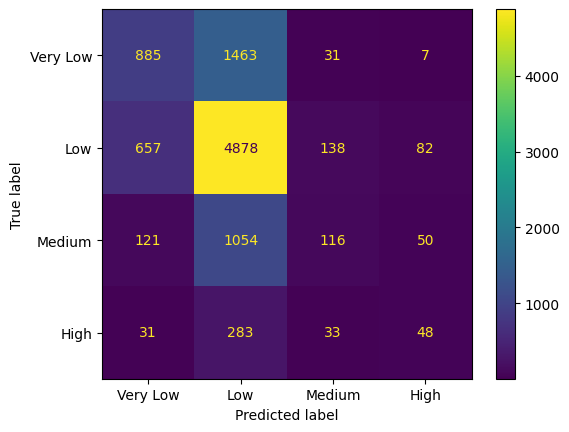

In [ ]:
# Part 4 - Starter Task Code:

# Define Price Categories
price_bins = [0, 1000, 2000, 3000, float('inf')]
price_labels = ['Very Low', 'Low', 'Medium', 'High']
apartments_df['price_category'] = pd.cut(apartments_df['price'], bins=price_bins, labels=price_labels)

# Select Features and Target
features = ['bedrooms', 'bathrooms', 'square_feet']
X = apartments_df[features]
y = apartments_df['price_category']

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)

# Initialize and Train the Model
decision_tree = DecisionTreeClassifier(random_state=12345)
decision_tree.fit(X_train, y_train)

# Predict the price categories on the test set
y_pred = decision_tree.predict(X_test)

# Output
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=price_labels)
ConfusionMatrixDisplay(conf_matrix, display_labels=price_labels).plot()

# Compute and print the accuracy, weighted precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=price_labels)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print("\nClassification Report:\n", class_report)



## Enhanced Task

In this task, you are challenged to enhance the accuracy of your classification model. You have the freedom to explore the dataset, choose different features, and determine the best combination to categorize apartments into price ranges more effectively:

1. **Explore and Select Features:**
   - Investigate the dataset thoroughly. While the starter task used `['bedrooms', 'bathrooms', 'square_feet']`, consider other available features that could impact the price category.
   - Be innovative with your feature selection. You are not limited to the features used previously. Analyze correlations, create new composite features, or consider interactions between features that may provide additional predictive power.

2. **Feature Engineering:**
   - Apply any necessary transformations to your selected features to prepare your dataset. This may include scaling, encoding categorical variables, or handling missing values.

3. **Data Preparation:**
   - With your newly selected features, prepare your data for training. Ensure you maintain a consistent split for training and testing sets, using the same `random_state=12345` for reproducibility.

4. **Model Training and Evaluation:**
   - Retrain your `DecisionTreeClassifier`. Keep the `random_state` parameter for consistent results.
   - Evaluate your model on the testing set. Has the accuracy improved with the new features?

5. **Output:**
   - Display the confusion matrix with appropriate labels for clarity.
   - Compute the accuracy of the model and print it.
   - Calculate and print the weighted precision and recall and print it.
   - Produce a classification report that includes precision, recall, and f1-score for each price category using the `classification_report` from `sklearn.metrics`.

Enhanced Model Accuracy: 0.8195808443859471
Enhanced Model Weighted Precision: 0.8198132930197007
Enhanced Model Weighted Recall: 0.8195808443859471

Enhanced Classification Report:
               precision    recall  f1-score   support

    Very Low       0.70      0.73      0.72       395
         Low       0.86      0.86      0.86      5755
      Medium       0.70      0.71      0.70      1341
        High       0.80      0.79      0.80      2386

    accuracy                           0.82      9877
   macro avg       0.77      0.77      0.77      9877
weighted avg       0.82      0.82      0.82      9877



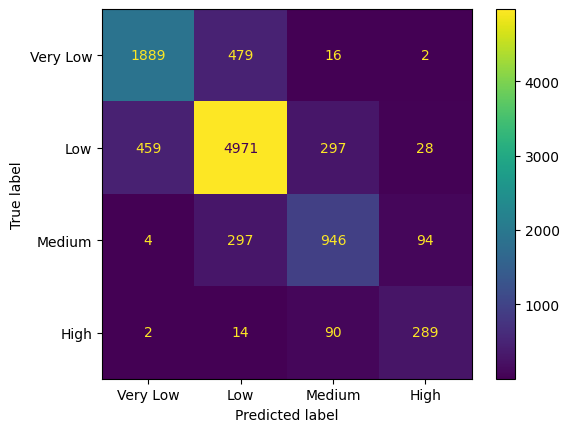

In [ ]:
# Part 4 - Enhanced Task Code:

# Define Price Categories
price_bins = [0, 1000, 2000, 3000, float('inf')]
price_labels = ['Very Low', 'Low', 'Medium', 'High']
apartments_df['price_category'] = pd.cut(apartments_df['price'], bins=price_bins, labels=price_labels)

# Enhanced Feature Selection including latitude, longitude, amenities, and pets_allowed dummy variables
amenities_features = ['AC', 'Alarm', 'Basketball', 'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman',
                      'Elevator', 'Fireplace', 'Garbage Disposal', 'Gated', 'Golf', 'Gym', 'Hot Tub',
                      'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator',
                      'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer', 'Wood Floors']
pets_allowed_features = ['Cats', 'Dogs', 'None']
enhanced_features = ['bedrooms', 'bathrooms', 'square_feet', 'latitude', 'longitude'] + amenities_features + pets_allowed_features
X_enhanced = apartments_df[enhanced_features]
y_enhanced = apartments_df['price_category']

# Split the Dataset
X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(X_enhanced, y_enhanced, test_size=0.1, random_state=12345)

# Initialize and Train the Enhanced Model
decision_tree_enhanced = DecisionTreeClassifier(random_state=12345)
decision_tree_enhanced.fit(X_train_enhanced, y_train_enhanced)

# Predict the price categories on the test set with the enhanced model
y_pred_enhanced = decision_tree_enhanced.predict(X_test_enhanced)

# Output for Enhanced Model
# Confusion Matrix
conf_matrix_enhanced = confusion_matrix(y_test_enhanced, y_pred_enhanced, labels=price_labels)
ConfusionMatrixDisplay(conf_matrix_enhanced, display_labels=price_labels).plot()

# Compute and print the accuracy, weighted precision, and recall
accuracy_enhanced = accuracy_score(y_test_enhanced, y_pred_enhanced)
precision_enhanced = precision_score(y_test_enhanced, y_pred_enhanced, average='weighted')
recall_enhanced = recall_score(y_test_enhanced, y_pred_enhanced, average='weighted')

# Classification Report
class_report_enhanced = classification_report(y_test_enhanced, y_pred_enhanced, target_names=price_labels)

# Printing the results for the enhanced model
print(f"Enhanced Model Accuracy: {accuracy_enhanced}")
print(f"Enhanced Model Weighted Precision: {precision_enhanced}")
print(f"Enhanced Model Weighted Recall: {recall_enhanced}")
print("\nEnhanced Classification Report:\n", class_report_enhanced)


## Enhanced Task Explanation:

Reflect on which features were most influential and how your feature selection strategy impacted the model's performance.

The enhanced Decision Tree Classifier's accuracy of 81.96% demonstrates the effectiveness of the selected features.

*Latitude* and *longitude* were crucial to capture location-based price variations intrinsic to real estate markets.

*Amenities* such as *AC*, *gym*, and *pool*, represented as dummy variables provide detailed insights into how specific features influence rental prices, with more amenities often correlating with higher prices.

The inclusion of *'Pets Allowed'* catered to a significant market segment, impacting desirability and rental price categories.

Fundamental features like bedrooms, bathrooms, and square footage remained key, directly reflecting an apartment's size and capacity.

Overall, the combination of quantitative features (like square footage) with qualitative aspects (such as amenities and pet policies) enabled the model to capture a comprehensive range of variables influencing apartment pricing.


# Part 5 - Comparing Average Rental Prices to State Median Incomes

## Starter Task:

1. **Data Aggregation:**
   - Group the data by the `'state'` column.
   - Calculate the average rental price for each state and store the results.

2. **Data Retrieval:**
   - Retrieve the state median income data from the provided JSON URL:https://res.cloudinary.com/dixv5n1ye/raw/upload/v1699335440/state_income_b5yz22.json using the `requests` library.
   - Ensure that the request is successful before proceeding. If not, print the status code to help diagnose the issue.

3. **Data Integration:**
   - Convert the retrieved median income data into a pandas Series or DataFrame for ease of manipulation.
   - Merge this data with the average rental prices you calculated earlier, ensuring that each state's data lines up correctly.

4. **Ratio Calculation:**
   - For each state in your combined dataset, compute the ratio of the average rental price to the median income.
   - Sort the resulting data by this ratio in descending order to identify which states have the highest cost of living relative to income.

5. **Visualization:**
   - Using Plotly, create a bar chart to visualize the rent-to-income ratio for each state.
   - Ensure that your chart includes appropriate labels for the x-axis (State), y-axis (Rent to Income Ratio), and a title.


In [ ]:
# Part 5 - Starter Task Code:

import json

# Data Aggregation: Calculating average rental price for each state
average_rental_prices = apartments_df.groupby('state')['price'].mean().reset_index()

# Data Retrieval: Retrieving state median income data
url = 'https://res.cloudinary.com/dixv5n1ye/raw/upload/v1699335440/state_income_b5yz22.json'
response = requests.get(url)

if response.status_code == 200:
    state_income_data = response.json()
    # Data Integration
    state_median_income_df = pd.DataFrame(state_income_data.items(), columns=['state', 'median_income'])
    # Merging the average rental prices with state median incomes
    combined_data = pd.merge(average_rental_prices, state_median_income_df, on='state')

    # Ratio Calculation
    combined_data['rent_to_income_ratio'] = combined_data['price'] / combined_data['median_income']
    combined_data_sorted = combined_data.sort_values(by='rent_to_income_ratio', ascending=False)

    # Visualization with Blue-Orange Gradient
    fig = px.bar(combined_data_sorted, x='state', y='rent_to_income_ratio',
                 title='Rent to Income Ratio by State',
                 labels={'rent_to_income_ratio': 'Rent to Income Ratio', 'state': 'State'},
                 color='rent_to_income_ratio', color_continuous_scale='Bluered_r') # Using 'Bluered_r' for blue-orange gradient
    fig.show()
else:
    print("Failed to retrieve data. Status Code:", response.status_code)


## Enhanced Task: Creative Data Integration and Visualization

Leverage your skills in data analysis and visualization by taking the provided apartments dataset and creatively linking it with any publicly available dataset of your choice (accessible via file download, API, or JSON request). Your goal is to find an intriguing, relevant connection between the apartments data and your chosen dataset. This could involve demographics, environmental factors, transportation, local amenities, or any other interesting angle you uncover. Utilize Python Plotly to craft a unique, insightful visualization that tells a compelling story about the relationship between these datasets. There are no boundaries to your creativity; explore, analyze, and visually articulate the intriguing narratives hidden within the data.


### Integration and Analysis of Home Loan Approval Data with Apartments Dataset

Here, we will attempt to integrate home loan approval data from a public dataset on Kaggle (https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval/data) to find some interesting observations on how applicants who typically finance their homes through loans compare against the apartment prices in our initial dataset.

This Loan Sanction dataset contains parameters such as Loan Amount sanctioned, Applicant Incomes, Gender, Marriage Status, type of property being applied to (Urban, Rural, Semi-Urban) and whether the loan was sanctioned or not.

This dataset has been imported into the Data folder via file download.

We will demonstrate our analysis through three visualizations:

- A comparison of sanctioned Loan Amounts against categorical variables of Education Status and Gender

- A distribution analysis of Apartment Prices and how many such selected loan applicants can afford these apartment units

- A faceted analysis of Apartment Prices versus the Loan Amount sanctioned and how this varies across applicants' Marriage Status and Property Type

In [ ]:
# Loading dataset for Loan Sanction downloaded from the following URL
# https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval/data
loan_sanction_df = pd.read_csv('Data/Loan_Sanction.csv')

# Visualization 1: Average Loan Amount by Education and Gender

# Grouping by Education and Gender to find average loan amount
grouped_data = loan_sanction_df.groupby(['Education', 'Gender'])['LoanAmount'].mean().reset_index()

# Creating a segmented bar graph
fig = px.bar(grouped_data, x='Education', y='LoanAmount', color='Gender',
             barmode='group',
             title='Average Loan Amount by Education and Gender',
             color_discrete_map={'Male': 'orange', 'Female': 'blue'})

# Display the plot
fig.show()

Here, we observe that applicants who are graduates are typically sanctioned ~18% more for females and ~32% more for males.

In [ ]:
# Visualization 2: Histogram of Cumulative Affordability

# Filter the loan_sanction_df for applicants where the loan was sanctioned
sanctioned_loans = loan_sanction_df[loan_sanction_df['Loan_Status'] == 'Y']

# Determine the affordability
# Assuming 'Loan_amount' represents the amount that can be spent on purchasing a property
affordability = pd.DataFrame({
    'Apartment Price': apartments_df['price'],
    'Can Afford': apartments_df['price'].apply(lambda x: (sanctioned_loans['LoanAmount'] >= x).sum())
})

# Histogram of Apartment Prices vs. Number of Applicants Who Can Afford
hist_fig = px.histogram(affordability, x='Apartment Price', y='Can Afford',
                        title='Number of Approved Applicants Who Can Afford Each Apartment Price')

# Display the sum of applicants that can afford that home as 'Cumulative Affordability'
hist_fig.update_yaxes(title_text='Cumulative Affordability')

# Display the plot
hist_fig.show()


This distribution is right-skewed, indicating that applicants can often afford higher home prices (>500K).

Finally, we check for a faceted distribution of Property Price v/s Loan Amount by Marriage Status and Property Type, which gives us a better understanding of how these distributions vary across their respective categorical variables.

Our analysis can be pretty helpful for home buyers to understand what properties they are better suited to target for and for property dealers to understand their customer base and price points to target.

In [ ]:
# Visualization 3: Facted Distibution of Property Price v/s Loan Amount by Marriage Status and Property Type

# Filter out rows where 'Married' is 'nan'
loan_sanction_df = loan_sanction_df[loan_sanction_df['Married'].notna()]

# Merging the average apartment price with the loan sanction dataset
combined_df = loan_sanction_df.copy()
combined_df['Average Apartment Price'] = apartments_df['price'].mean()

# Creating a facet grid with bar graphs
facet_fig = px.bar(combined_df, x='LoanAmount', y='Average Apartment Price',
                   facet_col='Married', facet_row='Property_Area',
                   title='Variation of Apartment Price by Loan Amount, Faceted by Marriage Status and Property Area')

# Update axes titles to appear only once
facet_fig.update_xaxes(title_text='Loan Amount', showticklabels=True, row=1) # Assuming 3 rows in facet grid
facet_fig.update_yaxes(title_text='Apartment Price', showticklabels=True, col=1) # Assuming 1 column in facet grid
facet_fig.update_traces(marker_color='red')

facet_fig.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7801797d-c26b-4a53-8579-4208899be6f9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>